In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [172]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [174]:
data.describe()
#data.head(15)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [176]:
#data.loc[data['HouseYear']>2020]

In [177]:
#data.loc[data['HouseYear']==20052011,'HouseYear']=2008
#data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [178]:
data.loc[data['Square']<data['KitchenSquare']+data['LifeSquare']]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
48,7596,23,1.0,47.080100,46.807989,12.0,3,9.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,96029.167877
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
69,6925,27,2.0,64.929103,63.304605,10.0,15,17.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,228584.001072
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
129,6072,6,1.0,65.102017,64.622603,1.0,10,9.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,175899.978284
136,6172,27,2.0,92.400007,92.069236,10.0,2,5.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,116942.671045
145,14787,34,2.0,60.366626,57.709149,10.0,20,19.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,241737.808497


In [179]:
data.loc[data['KitchenSquare']>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [180]:
data.loc[data['KitchenSquare']==2014.0,'KitchenSquare']=5

In [181]:
data.loc[data['KitchenSquare']==1970,'KitchenSquare']=data['Square']-data['LifeSquare']

In [182]:
data.loc[data['LifeSquare'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
27,7550,23,2.0,64.556209,NaN,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,173910.923723
36,11703,23,1.0,41.118766,NaN,1.0,4,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,103510.223601
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
43,175,23,2.0,58.692133,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,184501.011225
46,1821,23,2.0,49.929489,NaN,1.0,9,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,88464.425395


In [183]:
data.loc[data['LifeSquare'].isnull(),'LifeSquare'] = 37

In [184]:
data.loc[data['KitchenSquare']<5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,37.000000,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,37.000000,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
12,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
21,11935,27,2.0,64.711835,37.000000,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,37.000000,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,37.000000,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
27,7550,23,2.0,64.556209,37.000000,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,173910.923723


In [185]:
data.loc[data['KitchenSquare']<5,'KitchenSquare'] = data['Square']-data['LifeSquare']

In [186]:
data.loc[data['KitchenSquare']<5,'KitchenSquare'] = 6

In [187]:
data.loc[data['KitchenSquare']>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,37.0,567.705972,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538


In [188]:
data.loc[data['KitchenSquare']>250,'KitchenSquare']=6

In [189]:
data.loc[data['Square'] > 600]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,37.000000,6.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [190]:
data.loc[data['Square']>600 ,'Square'] = 48

In [191]:
data.loc[data['Square']>409 ,'Square'] = 48

In [192]:
data.loc[data['LifeSquare']>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
4328,16550,27,3.0,81.694417,7480.592129,6.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,48.000000,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,48.000000,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [193]:
data.loc[data['LifeSquare']>250, 'LifeSquare' ] = data['Square']-data['KitchenSquare']

In [194]:
#data.loc[round(data['LifeSquare'],2)==263.54,'LifeSquare']=data['Square']-data['KitchenSquare']

In [195]:
#data.loc[round(data['LifeSquare'],2)==7480.59,'LifeSquare']=data['Square']-data['KitchenSquare']

In [196]:
#data.loc[round(data['LifeSquare'],2)==461.46,'LifeSquare']=data['Square']-data['KitchenSquare']

In [197]:
#data.loc[round(data['LifeSquare'],2)==461.46]
data.loc[data['Square']>155]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.000000,7,3.0,2007,0.000000,B,B,23,5067,4,NaN,2,6,B,338644.075979
1641,11055,151,1.0,174.649522,174.837082,15.000000,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
1812,5602,93,3.0,169.385184,37.000000,132.385184,2,10.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,190949.293998
1981,7917,27,0.0,212.932361,211.231125,6.000000,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.000000,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
2603,5621,23,3.0,163.495333,161.504222,12.000000,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
3260,16204,23,1.0,160.647588,37.000000,123.647588,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452
3368,6674,54,1.0,168.086347,125.486563,30.000000,18,28.0,2011,0.006076,B,B,30,5285,0,645.0,6,6,B,367353.574566
3651,5300,30,3.0,169.509941,170.713651,6.000000,2,2.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,200800.673767
4047,15362,23,1.0,163.286965,161.155275,6.000000,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347


In [198]:
data.loc[data['Square']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,6.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,6.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,6.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,6.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,6.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,0.0,2.377248,0.873147,6.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,6.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,6.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,6.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,6.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006


In [199]:
data.loc[data['Square']<10,'Square']=data['LifeSquare']+data['KitchenSquare']


In [200]:
data.loc[data['Square']<10,'Square']=data['Square']*10

In [201]:
data.loc[data['Square']<10,'Square']=data['Square']*10

In [202]:
data.loc[data['Square']>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [203]:
data.loc[data['Square']>300,'Square']=data['Square']/10

In [204]:
data.loc[data['Square']>1500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [205]:
data.loc[data['Square']>150,'Square']=data['Square']-50

In [206]:
#data['CoeSquareLifeSquare'] = (data['LifeSquare'] + data['KitchenSquare'])/data['Square']

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [208]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.095937,36.258340,12.349754,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,18.507293,15.844558,13.195625,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,10.525736,0.370619,5.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.784346,25.527399,6.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.529412,37.000000,8.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.912854,41.421759,10.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,225.645284,233.949309,133.379494,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [209]:
train,valid=train_test_split(data, test_size=0.3, random_state=42)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [211]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [212]:
scaler=MinMaxScaler()

In [213]:
train_scaled=scaler.fit_transform(train.loc[:,['Square','DistrictId']])

In [214]:
train_scaled

array([[0.2223284 , 0.11004785],
       [0.73632792, 0.11004785],
       [0.20821943, 0.41626794],
       ...,
       [0.51967785, 0.00478469],
       [0.29156567, 0.44976077],
       [0.55645834, 0.00956938]])

In [215]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=10)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(f"{i} temp_inertia {temp_inertia} ")
    inertia_arr.append(temp_inertia)

2 temp_inertia 207.96556465199492 
3 temp_inertia 148.3555760067468 
4 temp_inertia 111.33834758465059 
5 temp_inertia 91.03254883095349 
6 temp_inertia 74.93565013607446 
7 temp_inertia 64.64301119549383 
8 temp_inertia 56.20069944241938 
9 temp_inertia 49.507158001102425 


Text(0.5, 1.0, 'INERTIA')

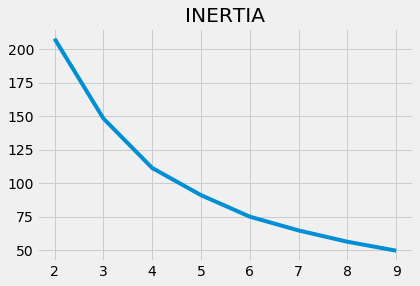

In [216]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA')

In [217]:
from sklearn.cluster import AgglomerativeClustering

In [218]:
model=AgglomerativeClustering(n_clusters=5)

In [219]:
#train['cluster_CoeSquareLifeSquare']=model.fit_predict(train_scaled)
train['cluster_Square']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

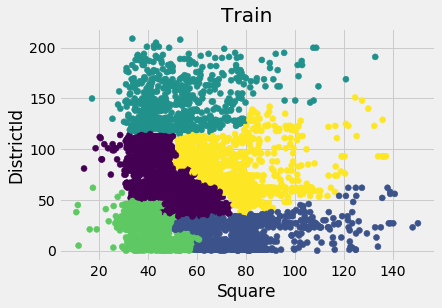

In [221]:
plt.scatter(train['Square'],train['DistrictId'],c=train['cluster_Square'])
plt.xlabel('Square')
plt.ylabel('DistrictId')
plt.title('Train')

In [222]:
from sklearn.neighbors import KNeighborsClassifier

In [223]:
knn=KNeighborsClassifier(n_neighbors=5)

In [224]:
knn.fit(train_scaled,train['cluster_Square'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [225]:
valid_scaled=scaler.transform(valid.loc[:,['Square','DistrictId']])

In [226]:
valid['cluster_Square']=knn.predict(valid_scaled)

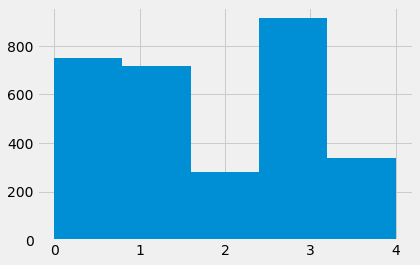

In [227]:
valid['cluster_Square'].hist(bins=5);

In [228]:
distr_info1=train['DistrictId'].value_counts().reset_index().rename(columns={'DistrictId':'large_district','index':'DistrictId'})

In [229]:
distr_info1.describe()

,DistrictId,large_district
count,202.000000,202.000000
mean,100.792079,34.653465
std,58.930909,68.051624
min,0.000000,1.000000
25%,50.250000,5.000000
50%,100.500000,14.000000
75%,150.750000,40.750000
max,209.000000,574.000000


In [230]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [231]:
distr_info1.head()

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1


In [232]:
distr_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [233]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [234]:
price=train['Price'].mean()
price

214449.1673897029

In [235]:
price_mean_by_rooms= train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291


In [236]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [237]:
#price_mean_by_house_year=train.groupby(['DistrictId','HouseYear'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_hy'})
#price_mean_by_house_year.head()

In [238]:
#price_mean_by_house_year,
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
 #   df=pd.merge(df,price_mean_by_house_year,on='HouseYear',how='left')
    df['mean_price_by_dr']= df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
 #   df['mean_price_by_hy']=df['mean_price_by_hy'].fillna(price)
    return df

In [239]:
def dummies_d(df,cluster_year='cluster_Square'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [240]:
train=add_distr_info(train,distr_info1)

In [241]:
#,price_mean_by_house_year
train=add_mean_price(train,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [242]:
train=dummies_d(train)

In [243]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2',
       'cluster_Square_3', 'cluster_Square_4'],
      dtype='object')

In [244]:
#train

In [245]:
#'cluster_Square_3',  
feats=['Rooms','large_district', 'is_large','cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2', 'cluster_Square_4','HouseYear', 'Ecology_1']

In [246]:
from sklearn.ensemble import RandomForestRegressor as RF
model=RF(n_estimators=40,max_depth=10,random_state=42)
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

In [247]:
model.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [248]:
#feats_n = ['large_district', 'is_large', 'cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2','cluster_Square_3', 'cluster_Square_4']
#plt.barh(feats_n, model.coef_.flatten())
#plt.xlabel('Вес признака')
#plt.ylabel('Признак')

In [249]:
valid=add_distr_info(valid, distr_info1)


In [250]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Id                3000 non-null int64
DistrictId        3000 non-null int64
Rooms             3000 non-null float64
Square            3000 non-null float64
LifeSquare        3000 non-null float64
KitchenSquare     3000 non-null float64
Floor             3000 non-null int64
HouseFloor        3000 non-null float64
HouseYear         3000 non-null int64
Ecology_1         3000 non-null float64
Ecology_2         3000 non-null object
Ecology_3         3000 non-null object
Social_1          3000 non-null int64
Social_2          3000 non-null int64
Social_3          3000 non-null int64
Healthcare_1      1560 non-null float64
Helthcare_2       3000 non-null int64
Shops_1           3000 non-null int64
Shops_2           3000 non-null object
Price             3000 non-null float64
cluster_Square    3000 non-null int64
large_district    3000 non-null float64
is_large          3000 non-null floa

In [251]:
#,price_mean_by_house_year
valid=add_mean_price(valid,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [252]:
valid=dummies_d(valid)

In [253]:
y_pred=model.predict(valid.loc[:,feats])

In [254]:
y_pred

array([172365.0149944 , 207226.87529841, 215392.22492018, ...,
       279421.58238077, 116188.89366416, 233505.15423695])

In [255]:
from sklearn.metrics import r2_score as r2

In [256]:
r2(valid['Price'],y_pred)

0.6446198759915645

In [257]:
r2(train['Price'],model.predict(train.loc[:,feats]))

0.8033276908001409

In [258]:
#test['CoeSquareLifeSquare'] = (test['LifeSquare'] + test['KitchenSquare'])/test['Square']

In [259]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [260]:
test_scaled=scaler.transform(test.loc[:,['Square','DistrictId']])
test['cluster_Square']=knn.predict(test_scaled)

In [261]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        3959 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
cluster_Square    5000 non-null int64
dtypes: float64(7), int64(10), object(3)
memory usage: 781.3+ KB


In [262]:
test=add_distr_info(test,distr_info1)
#, price_mean_by_house_year
test=add_mean_price(test,price_mean_by_distr_rooms,price_mean_by_rooms ,price)
test=dummies_d(test)

In [263]:
test['Price']=model.predict(test.loc[:,feats])

In [264]:
test.loc[:,['Id','Price']].to_csv('SZabudkin_predictions.csv',index=None)

In [265]:
pd.read_csv('SZabudkin_predictions.csv')

,Id,Price
0,725,157185.373699
1,15856,251272.940637
2,5480,286571.806369
3,15664,247920.452133
4,14275,134102.358833
5,7633,203984.107897
6,13329,164894.708502
7,5502,211888.774224
8,4220,311209.876251
9,11538,198042.763946


In [267]:
model.feature_importances_

array([0.39164657, 0.28404596, 0.0004845 , 0.00734173, 0.01827045,
       0.00388131, 0.01391156, 0.18461041, 0.09580751])